In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn.objects as so
from dotenv import load_dotenv
import seaborn as sns
import pandas as pd 
import boto3
import io
import os

load_dotenv()

True

In [2]:
bucket = os.getenv('AWS_BUCKET_NAME')
access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
secret_key = os.getenv('AWS_PRIVATE_KEY')

s3_client = boto3.client(
        's3',
        aws_access_key_id=access_key_id,
        aws_secret_access_key=secret_key)

read_response = s3_client.get_object(Bucket=bucket, Key='EPL 2024-2025 xG.csv')

xG_df = pd.read_csv(io.BytesIO(read_response['Body'].read()))


In [18]:
xG_df['xGD cumulative sum'] = xG_df['xGD_sum_over_gameweek']

In [22]:
top_5_xGD = xG_df[xG_df['team'].isin(['Manchester City', 'Liverpool', 'Arsenal', 'Chelsea', 'Tottenham'])]

In [23]:
top_5_xGD.head()

,gameweek,date,team,xGA,xG,xGD,xGD_sum_over_gameweek,xGD cumulative sum
2,1.0,2024-08-17,Arsenal,0.5,1.2,0.7,0.7,0.7
13,1.0,2024-08-17,Liverpool,0.5,2.6,2.1,2.1,2.1
14,1.0,2024-08-18,Manchester City,1.0,0.8,-0.2,-0.2,-0.2
17,1.0,2024-08-18,Chelsea,0.8,1.0,0.2,0.2,0.2
19,1.0,2024-08-19,Tottenham,1.0,1.2,0.2,0.2,0.2


In [5]:
so.Plot.config.theme.update(mpl.rcParams)

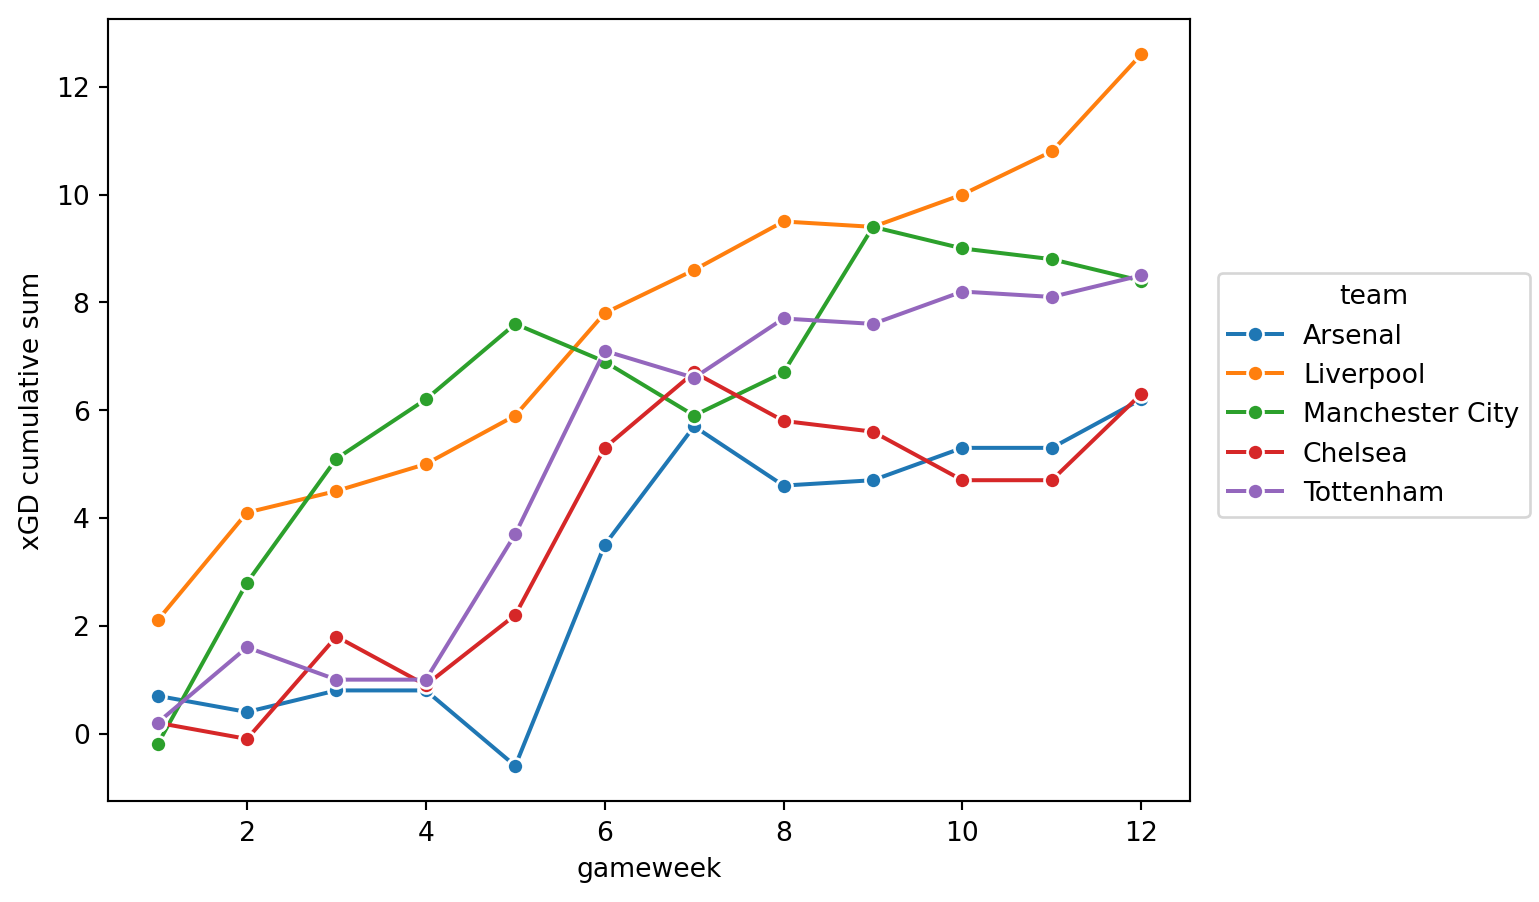

<Figure size 1200x800 with 0 Axes>

In [25]:
plt.figure(figsize=(12,8))
p = so.Plot(top_5_xGD, x='gameweek', y='xGD cumulative sum', color='team')
p.add(so.Line(), so.Agg())
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)
